Credit Card Fraud Detection Code

This Python script is designed for credit card fraud detection using a machine learning approach, particularly with a Random Forest Classifier.

The script performs the following steps:

1. Load and Explore Data:
   - Load the dataset using Pandas.
   - Display a preview of the dataset, its shape, and basic statistics.
   - Determine the number of fraud and valid transactions.



2. Data Visualization:
   - Visualize the correlation matrix using a heatmap to understand feature relationships.



3. Data Preprocessing:
   - Split the dataset into features (X) and the target variable (Y).
   - Split the data into training and testing sets.



4. Random Forest Classifier:
   - Build a Random Forest Classifier model.
   - Train the model on the training set.
   - Make predictions on the test set.



5. Model Evaluation:
   - Evaluate the model using various metrics such as accuracy, precision, recall, F1-score, and Matthews correlation coefficient.
   - Display a confusion matrix to visualize the classifier's performance.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

In [2]:
# Load the dataset from the CSV file using pandas
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
# Display the first few rows of the dataset
print("Preview of the dataset:")
print(data.head())

Preview of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        

In [4]:
# Display the shape and basic statistics of the dataset
print("\nDataset Shape:")
print(data.shape)
print("\nBasic Statistics:")
print(data.describe())


Dataset Shape:
(284807, 31)

Basic Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-

In [5]:
# Determine the number of fraud cases in the dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlier_fraction = len(fraud) / float(len(valid))
print("\nFraud Cases: {}".format(len(fraud)))
print("Valid Transactions: {}".format(len(valid)))
print("Outlier Fraction: {:.4f}".format(outlier_fraction))


Fraud Cases: 492
Valid Transactions: 284315
Outlier Fraction: 0.0017


In [6]:
# Display amount details of fraudulent transactions
print("\nAmount details of the fraudulent transactions:")
print(fraud.Amount.describe())


Amount details of the fraudulent transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [7]:
# Display amount details of valid transactions
print("\nDetails of valid transactions:")
print(valid.Amount.describe())


Details of valid transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


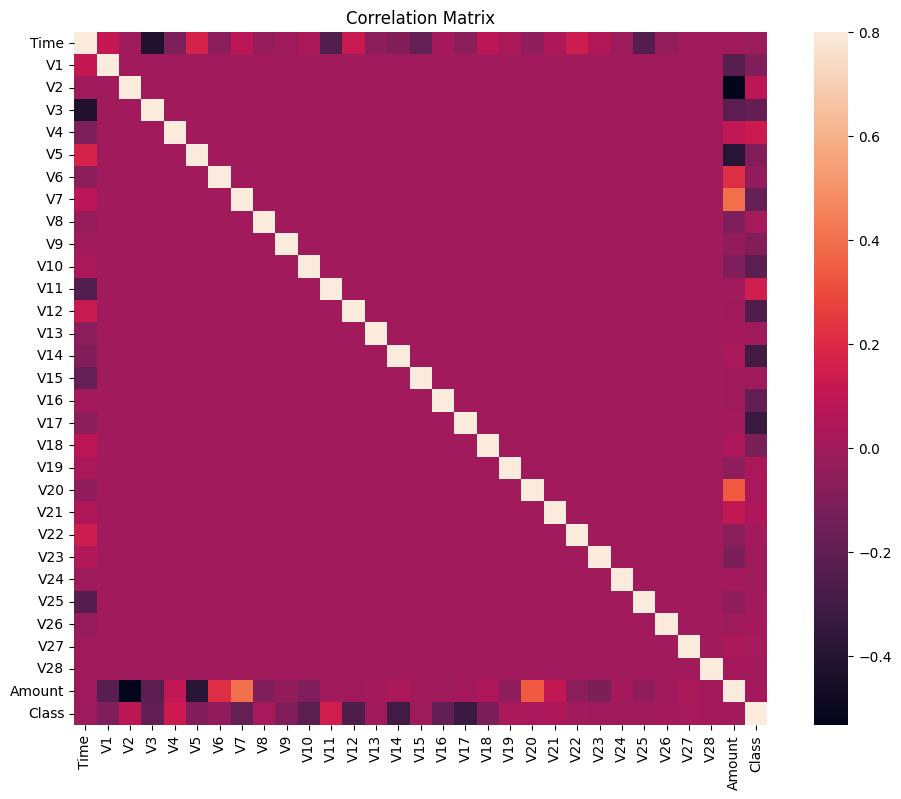

In [8]:
# Visualize the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=0.8, square=True)
plt.title("Correlation Matrix")
plt.show()

In [9]:
# Divide the data into features (X) and target variable (Y)
X = data.drop(['Class'], axis=1)
Y = data["Class"]

In [10]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
# Build and train the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [12]:
# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

In [13]:
# Evaluate the classifier
print("\nModel Evaluation:")
print("The model used is Random Forest Classifier")


Model Evaluation:
The model used is Random Forest Classifier


In [14]:
# Evaluate the classifier
print("\nModel Evaluation:")
print("The model used is Random Forest Classifier")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)


Model Evaluation:
The model used is Random Forest Classifier


In [15]:
# Evaluate the classifier
print("\nModel Evaluation:")
print("The model used is Random Forest Classifier")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("Matthews Correlation Coefficient: {:.4f}".format(mcc))


Model Evaluation:
The model used is Random Forest Classifier
Accuracy: 0.9996
Precision: 0.9740
Recall: 0.7653
F1-Score: 0.8571
Matthews Correlation Coefficient: 0.8632


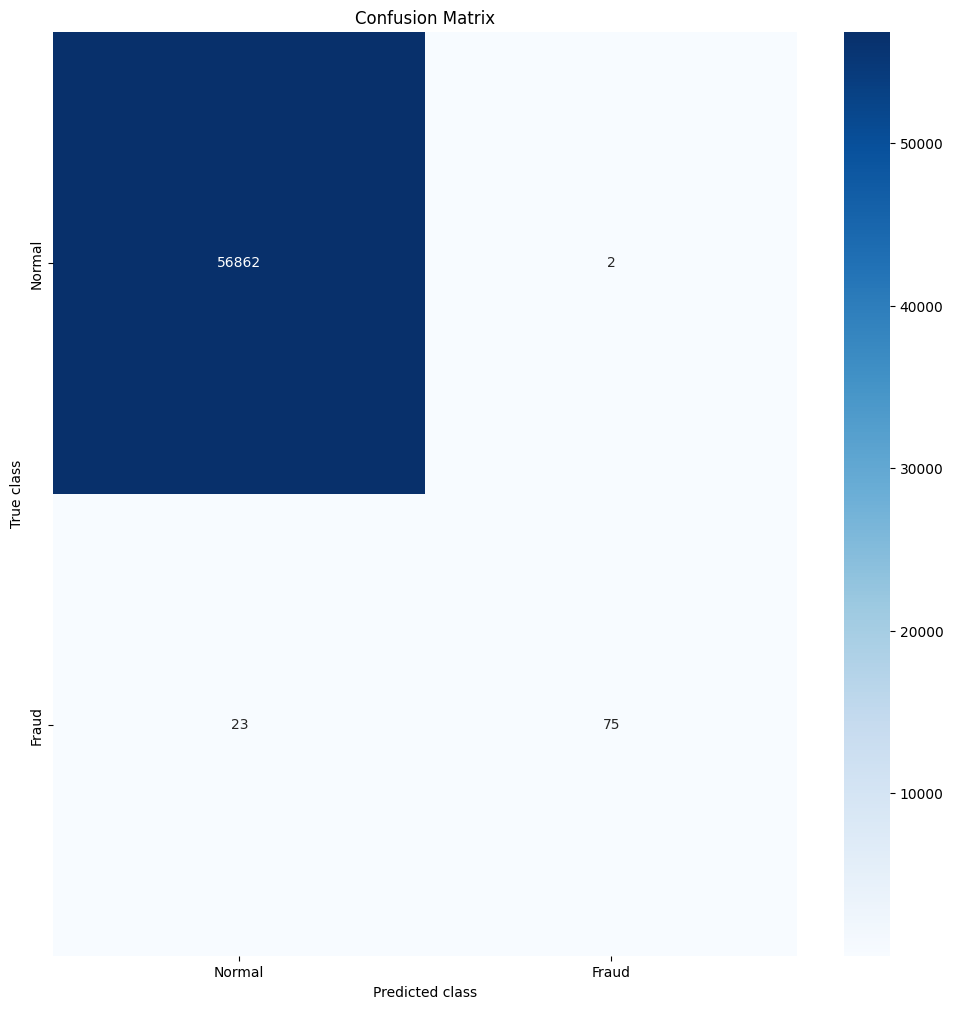

In [16]:
# Display the confusion matrix with differentiated colors
labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d", cmap="Blues")  # You can change "Blues" to another colormap
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

THE END